<h1>
    Data Exploration of Results
</h1>

<p>
    In this notebook we will be exploring the relationships between the categories that we will be predicting. Our actual data is a set of 3 images(set of pixel intensities) and we should be able to predict 10 factors from it: Gender(M/F),age(Age), handedness(Hand),education(Educ), socioeconomic status(SES), Mini-Mental State Examination(MMSE),Clinical Dementia Rating(CDR), Estimated total intracranial volume(eTIV), Atlas scaling factor(ASF), and normalized whole brain volume(nWBV).
</p>

<p>
    For the sake of this project we only care about predicting indicators that are interesting: Gender, Age, MMSE, CDR, eTIV and nWBV. 
    Our data for Educ, SES, MMSE, and CDR usually lack values for young to mid-aged adults which is simply a gap in the data. We can fill in some of the data - CDR and MMSE by assuming that most of the people do not have any indication of clinical dementia and for MMSE we can use the few data we have to fill in the rest of the data. Education and SES are interesting categories but the lack of data for the lower age is an issue b/c of the variability though we could assume they all fall into the average (college + middle class) 
</p>

<p>
    We decide to ignore Education and socioeconomic status for now and focus on 4 things: gender, age, cdr, and volume estimates. And the other categories can be considered stretch goals
</p>



In [19]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# # thinkstats tool
# import thinkstats2
# import thinkplot

# numpy, matplotlib, seaborn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# get train & test csv files as a DataFrame
train = pd.read_csv("data_summary.csv", sep=',')

def drop_columns(df,lst):
    final = df
    for x in lst:
        del final[x]
    return final


#clean up data
#drop all columns we don't care about
train = drop_columns(train,['Educ','nWBV','ASF','SES','Hand','MMSE'])
#fill in CDR NaN
train['CDR'] = train['CDR'].fillna(0.0)
#recode Male to 1 and Female to 0
train.loc[train["M/F"] == "M", "M/F"] = 1
train.loc[train["M/F"] == "F", "M/F"] = 0
print train


        MR Session    Subject M/F  Age  CDR  eTIV                    Scans
0    OAS1_0001_MR1  OAS1_0001   0   74  0.0  1344  mpr-1 mpr-2 mpr-3 mpr-4
1    OAS1_0002_MR1  OAS1_0002   0   55  0.0  1147  mpr-1 mpr-2 mpr-3 mpr-4
2    OAS1_0003_MR1  OAS1_0003   0   73  0.5  1454  mpr-1 mpr-2 mpr-3 mpr-4
3    OAS1_0004_MR1  OAS1_0004   1   28  0.0  1588  mpr-1 mpr-2 mpr-3 mpr-4
4    OAS1_0005_MR1  OAS1_0005   1   18  0.0  1737  mpr-1 mpr-2 mpr-3 mpr-4
5    OAS1_0006_MR1  OAS1_0006   0   24  0.0  1131  mpr-1 mpr-2 mpr-3 mpr-4
6    OAS1_0007_MR1  OAS1_0007   1   21  0.0  1516        mpr-1 mpr-2 mpr-3
7    OAS1_0009_MR1  OAS1_0009   0   20  0.0  1505  mpr-1 mpr-2 mpr-3 mpr-4
8    OAS1_0010_MR1  OAS1_0010   1   74  0.0  1636  mpr-1 mpr-2 mpr-3 mpr-4
9    OAS1_0011_MR1  OAS1_0011   0   52  0.0  1321  mpr-1 mpr-2 mpr-3 mpr-4
10   OAS1_0012_MR1  OAS1_0012   1   30  0.0  1574  mpr-1 mpr-2 mpr-3 mpr-4
11   OAS1_0013_MR1  OAS1_0013   0   81  0.0  1664  mpr-1 mpr-2 mpr-3 mpr-4
12   OAS1_0014_MR1  OAS1_

In [20]:
print train.describe()
print train.columns


              Age         CDR         eTIV
count  416.000000  416.000000   416.000000
mean    52.701923    0.151442  1480.526442
std     25.082180    0.294361   158.343745
min     18.000000    0.000000  1123.000000
25%     24.000000    0.000000  1366.750000
50%     56.000000    0.000000  1475.000000
75%     75.000000    0.000000  1578.000000
max     96.000000    1.000000  1992.000000
Index([u'MR Session', u'Subject', u'M/F', u'Age', u'CDR', u'eTIV', u'Scans'], dtype='object')


<p>
    Our Convulutional Neural Network will be used to predict all the columns in our data set. We want to group strongly correlated predicted features together that we predict will be able to be accurately modeled by one neural network. We can do this by exploring the relationship statistically but also through outside interpretation of what that category means.
</p>

<p>
    We can start by splitting our data into 4 roughly equal age groups. So that we can look if there are different relationships within the age groups.
</p>


In [21]:
age_1 = train[train.Age < 24]
age_2 = train[(train.Age >= 24) & (train.Age < 55)]
age_3 = train[(train.Age >= 55) & (train.Age < 75)]
age_4 = train[(train.Age >= 75) & (train.Age <= 90)]

print age_1.describe()
print age_2.describe()
print age_3.describe()
print age_4.describe()

             Age  CDR         eTIV
count  100.00000  100   100.000000
mean    20.83000    0  1529.230000
std      1.52458    0   135.999766
min     18.00000    0  1218.000000
25%     20.00000    0  1442.750000
50%     21.00000    0  1515.000000
75%     22.00000    0  1593.000000
max     23.00000    0  1913.000000
              Age  CDR         eTIV
count  102.000000  102   102.000000
mean    37.392157    0  1471.470588
std     10.663305    0   162.378223
min     24.000000    0  1131.000000
25%     26.250000    0  1357.250000
50%     37.500000    0  1465.500000
75%     48.000000    0  1578.750000
max     54.000000    0  1908.000000
              Age         CDR         eTIV
count  107.000000  107.000000   107.000000
mean    67.317757    0.228972  1450.551402
std      5.737329    0.324185   153.686721
min     55.000000    0.000000  1123.000000
25%     64.000000    0.000000  1350.500000
50%     69.000000    0.000000  1439.000000
75%     72.000000    0.500000  1541.500000
max     74.000000

<p>
    eTIV, nWBV, ASF are all derived measurements of anatomic volumes and thus will be heavily correlated. To visualize the relationship we will scatter plot them against each other.
</p>

<p> We see that there is an extremely strong negative relationship between eTIV and ASF but nWBV is not correlated with the other two factors</p>

<p>
    Thus eTIV and ASF can probably be grouped into on convulational neural network set.
</p>

 <p>In addition we can explore the effect of age on the volume predictions. We know that in general the brain will shrink as we age. </p>

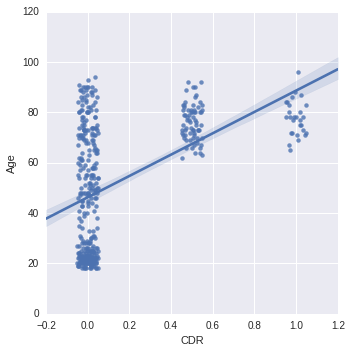

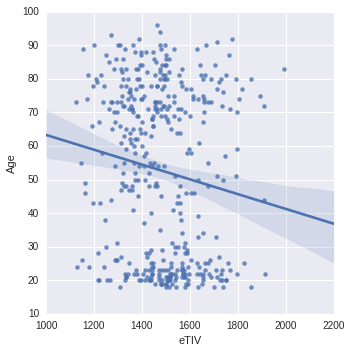

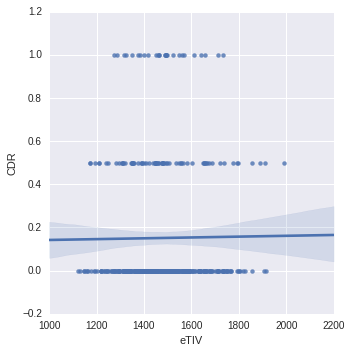

In [24]:
def plot_d1_v_d2(df_group,data1,data2):
    """ Takes two groups and looks at correlation between age and 3 different indicators eTIV, nWBV, and ASF
    Takes: data set and then data comparison groups as string or list of strings
    Return: every possible combination of the data sets
    """
    #We will jitter the age data slightly to get a better representation
    for i in range(len(data1)):
        for j in range(len(data2)):
            if i > j: 
                sns.lmplot(data1[i], data2[j], data = df_group, x_jitter=.05)
                
plot_d1_v_d2(train,['Age','CDR','eTIV'],['Age','CDR','eTIV'])



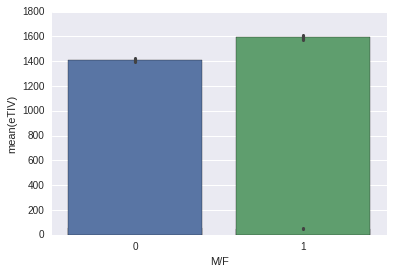

In [26]:
def plot_MF_data(df_group):
    """Takes in data frame and creates bar graphs for male female comparisons for the other 3 categories
    Takes: data frame
    Return: 6 bar graphs
    """
    lst = ['Age','CDR','eTIV']
    for x in lst:
        ax = sns.barplot(x="M/F", y=x, data=df_group)
plot_MF_data(train)

<p>
    From the 3 graphs there is a definate strong negative correlation between Age and nWBV. The other two measures however are extremely variable with a slight negative between age and eTIV and age and ASF
</p>

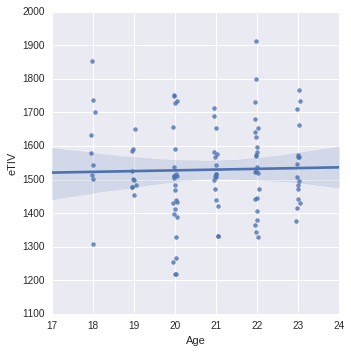

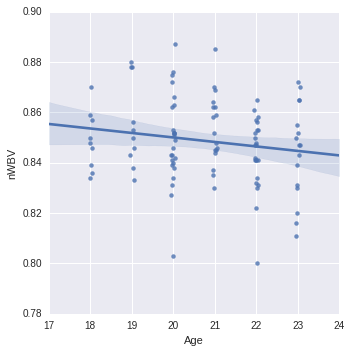

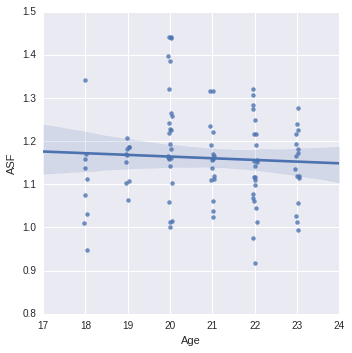

In [34]:
plot_age_vs_volume(age_1)

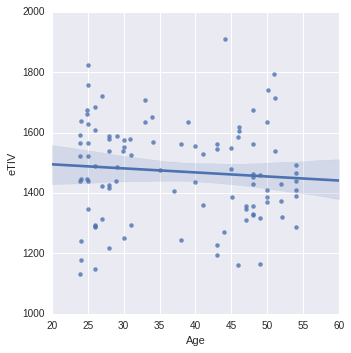

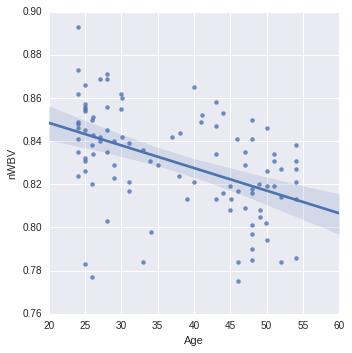

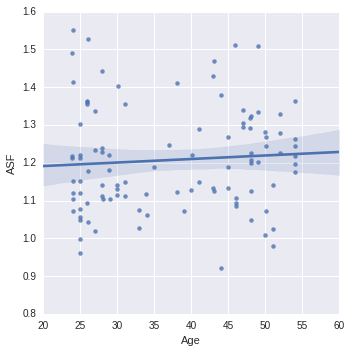

In [35]:
plot_age_vs_volume(age_2)


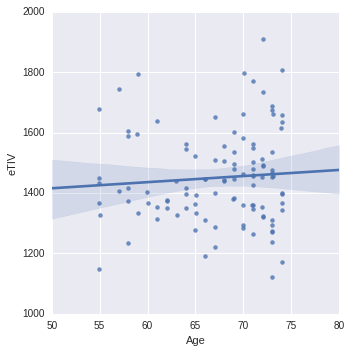

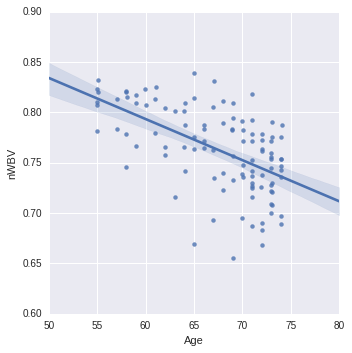

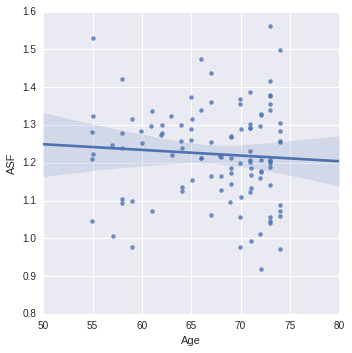

In [36]:
plot_age_vs_volume(age_3)


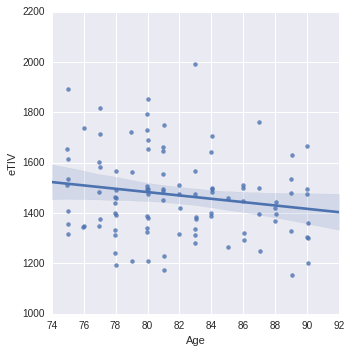

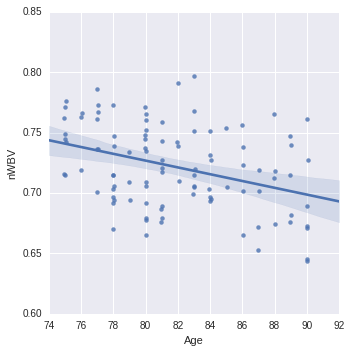

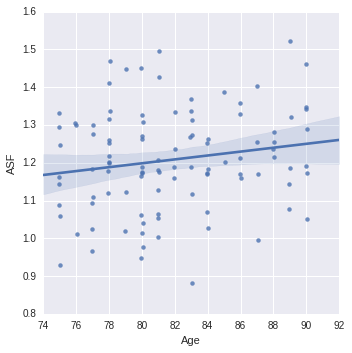

In [37]:

plot_age_vs_volume(age_4)

<p> We see that most of the factors are related across the age groups except for ASF -Age for non older adults which is actually opposite of the general trend.
</p>

<h2>
CDR relationships
</h2>
<p>
We will explore the relationship of CDR in response to our other relavent categories. We intuitively estimate that the volume and age will have correlations b/c dementia is more likely as one ages and with diminished volume.
</p>